In [30]:
import numpy as np
import matplotlib.pyplot as plt

초기 void fraction 10%를 가지는 130 $\mu$ m의 ply 16개로 만든 laminate를 $110^{\circ}$ C 에서 30분-1시간 wetting 했을 때, void가 얼마나 남아 있을지 구현한다.

In [31]:
L = 500 # [mm]
H = 0.13*16 #[mm]
Vf = 0.55
R = 8.3145 # [J/ mol K]

In [32]:
A = 153000 # [1/s]
dE = 66500 # [J/mol]
m = 0.813
n = 2.74
C = 43.1
a_C0 = -1.684
a_CT = 5.475/1000 # [1/K]
def dadt(alpha, T):
    Ka = A*np.exp(-dE/(R*T))
    num = Ka*alpha**m * (1-alpha)**n
    den = 1+ np.exp(alpha-a_C0-a_CT*T)
    return num/den

In [33]:
gas_mu0 = 1.81/10**8 # [kPa*s]
def gas_viscosity(T):
    # Sutherland's Formula
    gas_mu = gas_mu0*((293+117)/(T+117))*(T/293)**1.5
    return gas_mu

In [83]:
void_frac = 0.1
void_total = void_frac*L*L*H # [mm^3]
ramp_rate = 2 # [degree_C / min]
Pv = 0 # [kPa]
alpha = 0.01
K0 = 1/10**12 # [mm^2]
K = 5*K0
n = 50
Pcs = np.linspace(500, 1500, n)
ramp = [0]*n
results = [0]*n
voids0 = np.append(void_frac*H*(2*np.arange(1,L//2)-1),[0])
Ts = np.concatenate((np.linspace(20+273, 110+273, (110-20)//ramp_rate*60), (110+273)*np.ones(3600)), axis=None)
for k in range(n):
    Pc = Pcs[k]
    voids = np.copy(voids0) # shallow copy
    Ps = np.sqrt(2*np.arange(L//2-1)*(Pv*Pv-Pc*Pc)/L + Pc*Pc)
    i = 1
    for t in Ts:
        mu = gas_viscosity(t)
        Q = (2*np.arange(1,L//2))*H*K/(mu*L)*(Pc*Pc-Pv*Pv)/Ps
        transport = np.minimum(voids[:-1], Q)
        voids += -np.concatenate((transport, [0])) + np.concatenate(([0],transport))
        alpha += dadt(alpha, t)
        t += ramp_rate/60
        i += 1
        if i == 18*60:
            ramp[k] = voids[-1]
    results[k] = 4*voids[-1]
    

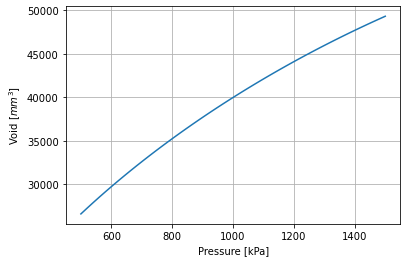

In [84]:
plt.plot(Pcs, results)
plt.xlabel("Pressure [kPa]")
plt.ylabel("Void [$mm^3$]")
plt.grid()

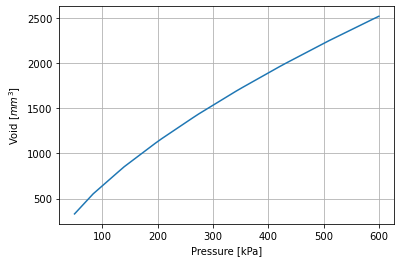

In [64]:
plt.plot(Pcs, ramp)
plt.xlabel("Pressure [kPa]")
plt.ylabel("Void [$mm^3$]")
plt.grid()

In [85]:
print(void_total, 4*voids[-1], 4*voids[-1]/void_total)

52000.0 49330.66319535089 0.9486665999105941
